### Гауссовский Байесовский Классификатор (ГБК)

Гауссовский Байесовский Классификатор (ГБК) является более общей версией наивного байесовского классификатора. В отличие от наивного подхода, ГБК не делает предположения о статистической независимости признаков внутри каждого класса. Вместо этого, он предполагает, что векторы признаков для каждого класса распределены согласно многомерному нормальному (гауссовскому) закону, характеризующемуся вектором средних значений (математических ожиданий) и ковариационной матрицей.

#### Оценка параметров

Параметры $\mu_y$ и $\Sigma_y$ оцениваются из обучающей выборки для каждого класса $y$:

- **Вектор средних значений $\mu_y$**: Вычисляется как среднее арифметическое всех векторов признаков, принадлежащих классу $y$.
  $$\mu_y = \frac{1}{N_y} \sum_{i \in \text{class } y} x_i$$

- **Ковариационная матрица $\Sigma_y$**: Вычисляется как выборочная ковариационная матрица для всех векторов признаков, принадлежащих классу $y$. Она представляет собой матрицу, элементы которой показывают ковариацию между каждой парой признаков. Для ее вычисления используется следующая формула:
  $$\Sigma_y = \frac{1}{N_y - 1} \sum_{i \in \text{class } y} (x_i - \mu_y)(x_i - \mu_y)^T$$

  Здесь $(x_i - \mu_y)$ — это вектор-столбец отклонений признаков $i$-го объекта от среднего для класса $y$, а $(x_i - \mu_y)^T$ — соответствующий вектор-строка.

где $N_y$ — количество объектов в классе $y$.

#### Плотность вероятности многомерного нормального распределения

Плотность вероятности $p(x | y)$ для вектора признаков $x$ при условии принадлежности к классу $y$ задается многомерным нормальным распределением:

$$p(x | y) = \frac{1}{\sqrt{(2\pi)^D |\Sigma_y|}} \exp\left( -\frac{1}{2}(x - \mu_y)^T \Sigma_y^{-1} (x - \mu_y) \right)$$

Где:
- $x$ — вектор признаков (например, $x = [x_1, x_2]^T$).
- $D$ — размерность вектора признаков (количество признаков).
- $\mu_y$ — вектор средних значений (математических ожиданий) признаков для класса $y$.
- $\Sigma_y$ — ковариационная матрица признаков для класса $y$.
- $|\Sigma_y|$ — определитель ковариационной матрицы $\Sigma_y$.
- $\Sigma_y^{-1}$ — обратная ковариационная матрица $\Sigma_y$.

#### Классификация

Классификация нового объекта $x$ происходит по тому же байесовскому принципу, что и в наивном байесовском классификаторе, но с использованием многомерной плотности вероятности. Цель — максимизировать апостериорную вероятность $P(y|x)$. С учетом штрафов за неверную классификацию ($\lambda_y$) и априорных вероятностей классов ($P_y$), правило классификации принимает вид:

$$a(x) = \operatorname{argmax}_{y \in Y} (\ln(\lambda_y \cdot P_y) + \ln(p(x | y)))$$

Где:
- $Y$ — множество всех классов.
- $\lambda_y$ — штраф за неверную классификацию класса $y$.
- $P_y$ — априорная вероятность появления образов класса $y$.
- $p(x | y)$ — условная вероятность признаков $x$ при условии принадлежности к классу $y$, рассчитанная по формуле многомерного нормального распределения.

На практике, для каждого объекта $x$ вычисляются значения логарифмических функций для каждого класса, и объект относится к тому классу, для которого это значение максимально.

#### Оценка качества классификатора

Для оценки качества классификации используется показатель $Q$, который представляет собой долю неверно классифицированных объектов:

$$Q(a,X) = \frac{1}{n} \sum_{i=1}^{n} [a(x_i) \neq y_i]$$

где:
- $n$ — общее количество объектов в выборке.
- $a(x_i)$ — предсказанный класс для объекта $x_i$.
- $y_i$ — истинный класс объекта $x_i$.
- $[\cdot]$ — скобки Айверсона, означающие, что выражение равно 1, если условие внутри истинно, и 0 в противном случае.

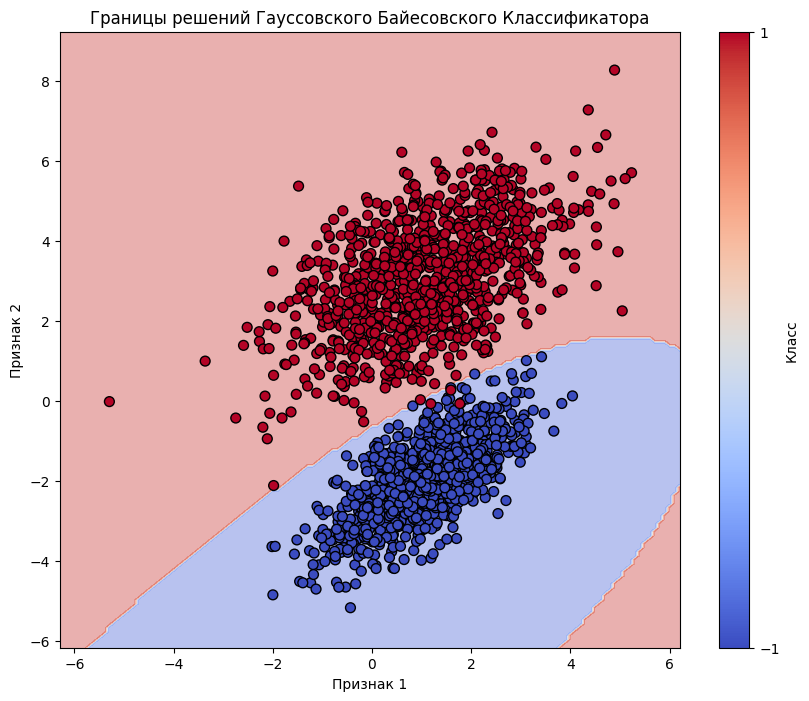

In [3]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [1, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# обучающая выборка
x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# вычисление оценок мат. ожиданий
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

# вычисление ковариационных матриц
a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# параметры для байесовского классификатора
Py1, L1 = 0.5, 1
Py2, L2 = 1 - Py1, 1

# --- Реализация Байесовского гауссовского классификатора ---
def gaussian_pdf(x, mean, cov):
    """Вычисление плотности многомерного нормального распределения"""
    d = len(x)
    cov_inv = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    norm_const = 1 / np.sqrt((2 * np.pi) ** d * det_cov)
    diff = x - mean
    return norm_const * np.exp(-0.5 * diff.T @ cov_inv @ diff)

predict = []
for x in x_train:
    # апостериорные вероятности с учётом априорных
    p1 = np.log(Py1) + np.log(gaussian_pdf(x, mm1, VV1))
    p2 = np.log(Py2) + np.log(gaussian_pdf(x, mm2, VV2))

    # выбор класса с максимальной вероятностью
    predict.append(np.argmax([p1,p2])*2 -1)

predict = np.array(predict)

# Вычисление показателя качества
Q = np.sum(predict != y_train)

import matplotlib.pyplot as plt

# Определим границы для построения сетки
x1_min, x1_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
x2_min, x2_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

# Создадим сетку
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))

# Функция для классификации одной точки
def classify_point(x):
    p1 = np.log(Py1) + np.log(gaussian_pdf(x, mm1, VV1))
    p2 = np.log(Py2) + np.log(gaussian_pdf(x, mm2, VV2))
    return np.argmax([p1,p2])*2 - 1

# Классифицируем каждую точку в сетке
Z = np.array([classify_point(np.array([x1_val, x2_val])) for x1_val, x2_val in np.c_[xx1.ravel(), xx2.ravel()]])
Z = Z.reshape(xx1.shape)

plt.figure(figsize=(10, 8))

# Отображаем области решений
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Отображаем обучающие данные
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=50)

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Границы решений Гауссовского Байесовского Классификатора')
plt.colorbar(ticks=[-1, 1], label='Класс')
plt.show()

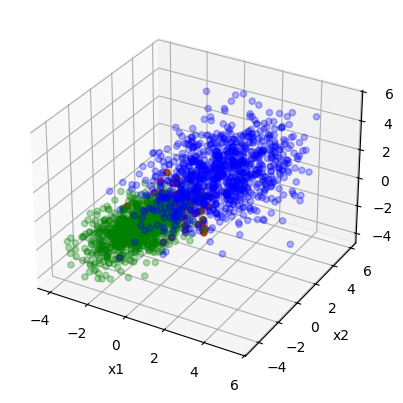

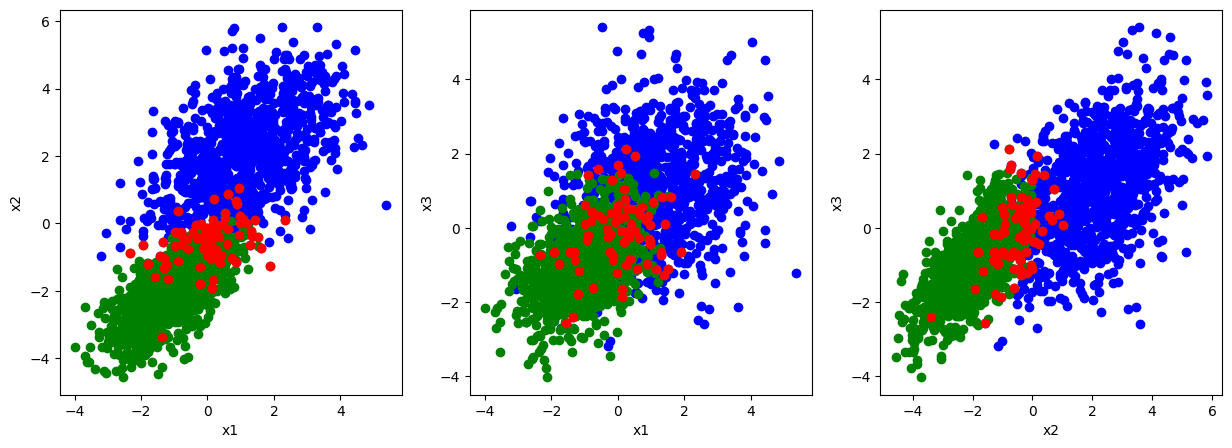

In [6]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
r1 = 0.7
D1 = 1.0
mean1 = [-1, -2, -1]
V1 = [[D1, D1 * r1, D1*r1*r1], [D1 * r1, D1, D1*r1], [D1*r1*r1, D1*r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [1, 2, 1]
V2 = [[D2, D2 * r2, D2*r2*r2], [D2 * r2, D2, D2*r2], [D2*r2*r2, D2*r2, D2]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# здесь продолжайте программу
# --- Вычисление оценок мат. ожиданий и ковариационных матриц ---
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = (a @ a.T) / N

a = (x2.T - mm2).T
VV2 = (a @ a.T) / N

# априорные вероятности и штрафы
Py1, L1 = 0.5, 1
Py2, L2 = 1 - Py1, 1


# --- функция плотности многомерного нормального распределения ---
def gaussian_pdf(x, mean, cov):
    d = len(x)
    cov_inv = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    norm_const = 1 / np.sqrt((2 * np.pi) ** d * det_cov)
    diff = x - mean
    return norm_const * np.exp(-0.5 * diff.T @ cov_inv @ diff)


# классификация
predict = []
for x in x_train:
    # p1 = log(Py1) + log(gaussian_pdf)
    p1 = Py1 * gaussian_pdf(x, mm1, VV1)
    p2 = Py2 * gaussian_pdf(x, mm2, VV2)
    predict.append(np.argmax([p1,p2])*2 - 1)

predict = np.array(predict)

# вычисление показателя качества
Q = np.sum(predict != y_train)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(x_train[y_train==1][:,0], x_train[y_train==1][:,1], x_train[y_train==1][:,2], color='blue', alpha=0.3)
ax.scatter3D(x_train[y_train==-1][:,0], x_train[y_train==-1][:,1], x_train[y_train==-1][:,2], color='green', alpha=0.3)
ax.scatter3D(x_train[y_train!=predict][:,0], x_train[y_train!=predict][:,1], x_train[y_train!=predict][:,2], color='red', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
axs[0].scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,1], color='blue')
axs[0].scatter(x_train[y_train==-1][:,0], x_train[y_train==-1][:,1], color='green')
axs[0].scatter(x_train[y_train!=predict][:,0], x_train[y_train!=predict][:,1], color='red')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[1].scatter(x_train[y_train==1][:,0], x_train[y_train==1][:,2], color='blue')
axs[1].scatter(x_train[y_train==-1][:,0], x_train[y_train==-1][:,2], color='green')
axs[1].scatter(x_train[y_train!=predict][:,0], x_train[y_train!=predict][:,2], color='red')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x3')
axs[2].scatter(x_train[y_train==1][:,1], x_train[y_train==1][:,2], color='blue')
axs[2].scatter(x_train[y_train==-1][:,1], x_train[y_train==-1][:,2], color='green')
axs[2].scatter(x_train[y_train!=predict][:,1], x_train[y_train!=predict][:,2], color='red')
axs[2].set_xlabel('x2')
axs[2].set_ylabel('x3')
plt.show()